# **Imports**

In [1]:
import pandas as pd
import numpy as np
import requests
import folium
from bs4 import BeautifulSoup
import pprint

!pip install geopy
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

import matplotlib.cm as cm
import matplotlib.colors as colors

from sklearn.cluster import KMeans

# **Reading Cities Data performing EDA**

## **Data Acquisition**

**Reading the cities data of Pakistan which has city names as well as longitudes and latitudes**

In [104]:
pakistan_cities=pd.read_excel('pk.xlsx')
pakistan_cities

,city,lat,lng,country,iso2,admin_name,capital,population,population_proper
0,Karachi,24.8600,67.0100,Pakistan,PK,Sindh,admin,14835000.0,14835000.0
1,Lahore,31.5497,74.3436,Pakistan,PK,Punjab,admin,11021000.0,11021000.0
2,Sialkot City,32.5000,74.5333,Pakistan,PK,Punjab,minor,3893672.0,3893672.0
3,Faisalabad,31.4180,73.0790,Pakistan,PK,Punjab,minor,3203846.0,3203846.0
4,Rawalpindi,33.6007,73.0679,Pakistan,PK,Punjab,minor,2098231.0,2098231.0
5,Peshawar,34.0000,71.5000,Pakistan,PK,Khyber Pakhtunkhwa,admin,1970042.0,1970042.0
6,Saidu Sharif,34.7500,72.3572,Pakistan,PK,Khyber Pakhtunkhwa,minor,1860310.0,1860310.0
7,Multan,30.1978,71.4711,Pakistan,PK,Punjab,minor,1606481.0,1606481.0
8,Gujranwala,32.1500,74.1833,Pakistan,PK,Punjab,minor,1569090.0,1569090.0
9,Islamabad,33.6989,73.0369,Pakistan,PK,Islāmābād,primary,1365000.0,1365000.0


## **Data Cleaning**

**Since we are only interested in a few top cities of Pakistan, we will filter the results to only those countries**

In [105]:
cities_of_interest=['Karachi','Lahore','Faisalabad','Rawalpindi','Islamabad','Quetta','Peshawar','Multan']
required_cities=pakistan_cities[pakistan_cities['city'].isin(cities_of_interest)]
required_cities

,city,lat,lng,country,iso2,admin_name,capital,population,population_proper
0,Karachi,24.8600,67.0100,Pakistan,PK,Sindh,admin,14835000.0,14835000.0
1,Lahore,31.5497,74.3436,Pakistan,PK,Punjab,admin,11021000.0,11021000.0
3,Faisalabad,31.4180,73.0790,Pakistan,PK,Punjab,minor,3203846.0,3203846.0
4,Rawalpindi,33.6007,73.0679,Pakistan,PK,Punjab,minor,2098231.0,2098231.0
5,Peshawar,34.0000,71.5000,Pakistan,PK,Khyber Pakhtunkhwa,admin,1970042.0,1970042.0
7,Multan,30.1978,71.4711,Pakistan,PK,Punjab,minor,1606481.0,1606481.0
9,Islamabad,33.6989,73.0369,Pakistan,PK,Islāmābād,primary,1365000.0,1365000.0
10,Quetta,30.1920,67.0070,Pakistan,PK,Balochistān,admin,1140000.0,1140000.0


## **Feature Selection**

In [108]:
required_cities=required_cities[['city','lat','lng']]
required_cities.reset_index(inplace=True,drop=True)
required_cities

,city,lat,lng
0,Karachi,24.8600,67.0100
1,Lahore,31.5497,74.3436
2,Faisalabad,31.4180,73.0790
3,Rawalpindi,33.6007,73.0679
4,Peshawar,34.0000,71.5000
5,Multan,30.1978,71.4711
6,Islamabad,33.6989,73.0369
7,Quetta,30.1920,67.0070


# **Using FourSquare API to explore each city**

Now that we have the data of the required cities, we will explore each city and find all the **Fast Food Restaurants** within a specific radius

**Firstly initialiing the API credentials**

In [90]:
CLIENT_ID = 'XPK5ARRHRJ14QVJX3AV21X1FUFH3KW53XDLD0CRJZVOGRGLC' # your Foursquare ID
CLIENT_SECRET = 'VIRM2YZWRFM3KK2LMEX0DZDKKWU5BAKQBSX2G2JRT3ELTG03' # your Foursquare Secret
VERSION = '20210515' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value
radius=10000

print('My credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

My credentails:
CLIENT_ID: XPK5ARRHRJ14QVJX3AV21X1FUFH3KW53XDLD0CRJZVOGRGLC
CLIENT_SECRET:VIRM2YZWRFM3KK2LMEX0DZDKKWU5BAKQBSX2G2JRT3ELTG03


Defining a function that will filter out only the **Fast Food Venues** for each city and add it to a dataframe.

In [91]:
def getAllRestaurants():

  restaurants_df=pd.DataFrame(columns=['City_Name','City_Lat','City_Lng','Venue_Name','Venue_Category','Venue_Lat','Venue_Lng','Venue_Address'])

  for city_name,city_lat,city_lng in zip(required_cities['city'],required_cities['lat'],required_cities['lng']):

    url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&categoryId={},&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET,'4bf58dd8d48988d16e941735', city_lat, city_lng, VERSION, radius, LIMIT)
    
    # make the GET request
    results = requests.get(url).json()["response"]['groups'][0]['items']


    for venue in results:      

      # limiting the results to only Fast Food Restaurants
      if (venue['venue']['categories'][0]['name']=='Fast Food Restaurant'):

        venue_address=''
        try:
           venue_address=venue['venue']['location']['address'],

        except:
          venue_address=city_name

        restaurants_df=restaurants_df.append(
            {'City_Name':city_name,
            'City_Lat':city_lat,
            'City_Lng': city_lng,
            'Venue_Name':venue['venue']['name'],
            'Venue_Lat':venue['venue']['location']['lat'],
            'Venue_Lng':venue['venue']['location']['lng'],
            'Venue_Address':venue_address,
            'Venue_Category':venue['venue']['categories'][0]['name']
            },ignore_index=True
        )

  return restaurants_df


restaurants_df=getAllRestaurants()
restaurants_df

,City_Name,City_Lat,City_Lng,Venue_Name,Venue_Category,Venue_Lat,Venue_Lng,Venue_Address
0,Karachi,24.8600,67.0100,Karachi Broast,Fast Food Restaurant,24.826819,67.026328,"(Boat Basin, Kh-e-Roomi,)"
1,Karachi,24.8600,67.0100,Roasters,Fast Food Restaurant,24.862709,67.054954,"(Sindhi Muslim Cooperative Housing Society,)"
2,Karachi,24.8600,67.0100,Hanifia,Fast Food Restaurant,24.881117,67.042152,"(Binori Town,)"
3,Karachi,24.8600,67.0100,Tooso,Fast Food Restaurant,24.882845,67.066238,"(Bahadur Shah Zafar Road,)"
4,Karachi,24.8600,67.0100,Milano,Fast Food Restaurant,24.816153,67.040003,"(Zamzama Blvd,)"
5,Karachi,24.8600,67.0100,Bilal Broast,Fast Food Restaurant,24.881119,67.042395,"(12 New Town, Jama Masjid,)"
6,Karachi,24.8600,67.0100,KFC,Fast Food Restaurant,24.826852,67.027390,"(Boat Basin,)"
7,Karachi,24.8600,67.0100,KBC Restaurant,Fast Food Restaurant,24.856892,67.030592,Karachi
8,Karachi,24.8600,67.0100,Subway,Fast Food Restaurant,24.827225,67.030201,"(Shop #39, Hashoo Terrace, Boat Basin,)"
9,Karachi,24.8600,67.0100,KFC,Fast Food Restaurant,24.849552,67.004348,"(I. I. Chundrigar Rd,)"


Checking the amount of **Fast Food Restaurants** returned by each city within a specific radius

In [99]:
all_cities=pd.DataFrame(restaurants_df['City_Name'].value_counts())
all_cities.reset_index(inplace=True)
all_cities.columns=['City_Name','Num_Fast_Food_Restaurants']
all_cities

,City_Name,Num_Fast_Food_Restaurants
0,Karachi,90
1,Lahore,57
2,Islamabad,31
3,Rawalpindi,14
4,Faisalabad,5
5,Multan,5
6,Quetta,5
7,Peshawar,4


**Plotting Barchart to see the number of Fast Food Restaurants in each City**

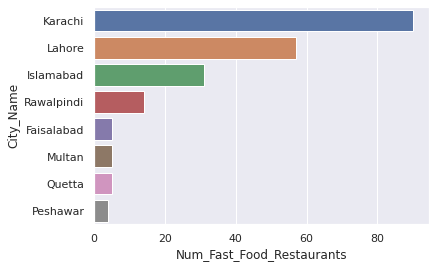

In [103]:
sns.barplot(y='City_Name',x='Num_Fast_Food_Restaurants',data=all_cities)

**We deduce that the top 3 cities are Karachi, Lahore and Islamabad so only exploring these cities for now**

In [93]:
required_cities_restaurants=restaurants_df[restaurants_df['City_Name'].isin(['Lahore','Karachi','Islamabad'])]
required_cities_restaurants.reset_index(inplace=True)
required_cities_restaurants

,index,City_Name,City_Lat,City_Lng,Venue_Name,Venue_Category,Venue_Lat,Venue_Lng,Venue_Address
0,0,Karachi,24.8600,67.0100,Karachi Broast,Fast Food Restaurant,24.826819,67.026328,"(Boat Basin, Kh-e-Roomi,)"
1,1,Karachi,24.8600,67.0100,Roasters,Fast Food Restaurant,24.862709,67.054954,"(Sindhi Muslim Cooperative Housing Society,)"
2,2,Karachi,24.8600,67.0100,Hanifia,Fast Food Restaurant,24.881117,67.042152,"(Binori Town,)"
3,3,Karachi,24.8600,67.0100,Tooso,Fast Food Restaurant,24.882845,67.066238,"(Bahadur Shah Zafar Road,)"
4,4,Karachi,24.8600,67.0100,Milano,Fast Food Restaurant,24.816153,67.040003,"(Zamzama Blvd,)"
5,5,Karachi,24.8600,67.0100,Bilal Broast,Fast Food Restaurant,24.881119,67.042395,"(12 New Town, Jama Masjid,)"
6,6,Karachi,24.8600,67.0100,KFC,Fast Food Restaurant,24.826852,67.027390,"(Boat Basin,)"
7,7,Karachi,24.8600,67.0100,KBC Restaurant,Fast Food Restaurant,24.856892,67.030592,Karachi
8,8,Karachi,24.8600,67.0100,Subway,Fast Food Restaurant,24.827225,67.030201,"(Shop #39, Hashoo Terrace, Boat Basin,)"
9,9,Karachi,24.8600,67.0100,KFC,Fast Food Restaurant,24.849552,67.004348,"(I. I. Chundrigar Rd,)"


**Now creating a map of Pakistan and plotting all the fast food locations on the map**

In [94]:
# create map
pak_lat=30.3753
pak_lng=69.3451
map_clusters = folium.Map(location=[pak_lat, pak_lng], zoom_start=6)


#set color scheme for the clusters
x = np.arange(len(list (required_cities_restaurants['City_Name'].unique()))+1)
ys = [i + x + (i*x)**2 for i in range(len(list (required_cities_restaurants['City_Name'].unique()))+1)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

city_color={'Karachi':0,'Islamabad':3,'Lahore':2}

# add markers to the map
markers_colors = []
for lat, lon, poi, city_name,address in zip(required_cities_restaurants['Venue_Lat'], required_cities_restaurants['Venue_Lng'], required_cities_restaurants['Venue_Name'], required_cities_restaurants['City_Name'],required_cities_restaurants['Venue_Address']):
    label = folium.Popup(str(poi) + ', ' + str(address), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[city_color[city_name]],
        fill=True,
        fill_color=rainbow[city_color[city_name]],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

Now that all the **Fast Food** Locations are plotted on the map for each major city of interest, the investor has a wide range of locations to choose from which best suits them.